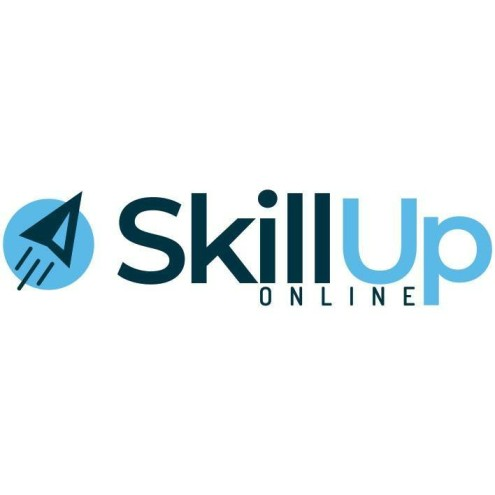

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Preparación del dataset

Para facilitarme el desarrollo de este cuaderno de Jupyter, decidi crear un repositorio de Github en el cual se encuentre el conjunto de datos además de una versión de este cuaderno y algunos enlaces útiles para este proyecto final. Además de un cuaderno colab en cual empece a desarrollar este trabajo. https://drive.google.com/file/d/1fCRprLZ0dZ0TPQUzaRxjIO7ymH_5ze4F/view?usp=drive_link


In [1]:
!git clone https://github.com/ChrisLe7/proyecto-final-ibm-ia.git

Clonando en 'proyecto-final-ibm-ia'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 10 (delta 2), pack-reused 0 (from 0)
Desempaquetando objetos: 100% (13/13), 4.65 KiB | 1.55 MiB/s, listo.


Una vez clonado el repositorio podemos utilizar la siguiente variable para almacenar el path del dataset.

In [3]:
path_file = "proyecto-final-ibm-ia/data/creditcard.csv"

### Importa las bibliotecas necesarias

Lo primero que debemos de hacer para poder realizar todas las tareas que se nos piden en este proyecto final es importar las bibliotecas esenciales para el análisis de los datos, tratamiento de los datos y entrenamiento de los modelos.

In [ ]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para los modelos
from sklearn.model_selection import train_test_split  # Para dividir el conjunto de datos
from sklearn.ensemble import RandomForestClassifier   # Modelo de Bosque Aleatorio
from sklearn.linear_model import LogisticRegression   # Modelo de Regresión Logística
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Evaluación
import xgboost as xgb
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

import shap

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

Después debemos de cargar el archivo `.csv` y cargarlo en un DataFrame de pandas para poder analizarlo.

In [5]:
df = pd.read_csv(path_file)

# Visualizar las primeras filas del dataset para entender su estructura
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

Para ellos, comprobaré si existen valores perdidos, ya que estos pueden afectar el análisis. Si existen, debería de eliminarlos o imputarlos (utilizando para ello algún tipo de estadístico (media o mediana)).

In [6]:
# Verificar la presencia de valores nulos
missing_values = df.isnull().sum()

# Mostrar las columnas que tienen valores nulos
missing_values[missing_values > 0]

Series([], dtype: int64)

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

Para verificar los valores perdidos, podemos utilizar la propia función de un DataFrame de `duplicated`` la cual comprueba si existen "filas" cuyos todos los valores sean iguales.

In [7]:
#Escribe tu código aquí
# Verificar y contar los datos duplicados
duplicated_rows = df.duplicated().sum()
duplicated_rows

np.int64(1081)

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



Para responder a esta pregunta, calcularé el porcentaje de transacciones en las que se ha identificado fraude. Normalmente, los datasets de fraude etiquetan las transacciones fraudulentas con un valor binario (0 o 1) en una columna específica.

Esto se puede realizar de difeentes formas, mediante la propia suma

In [8]:
# Calcula el porcentaje de transacciones fraudulentas
fraud_percentage = (df.Class.value_counts() / len(df)) * 100
# Esta es otra forma de hacerlo
# fraud_percentage = (df['Class'].sum() / len(df)) * 100

# Muestra el porcentaje de transacciones fraudulentas
print(fraud_percentage)

Class
0    99.827251
1     0.172749
Name: count, dtype: float64


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



Aquí obtendré el valor promedio de las transacciones fraudulentas. Esto ayuda a entender la magnitud del fraude.

In [9]:
# Calcula el importe medio de las transacciones fraudulentas

average_fraud_amount = df[df['Class'] == 1]['Amount'].mean()
# También se puede realizar de esta otra forma
# average_fraud_amount = df[df.Class == 1].Amount.mean()

# Muestra el importe medio de las transacciones fraudulentas
print(average_fraud_amount)

122.21132113821139


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

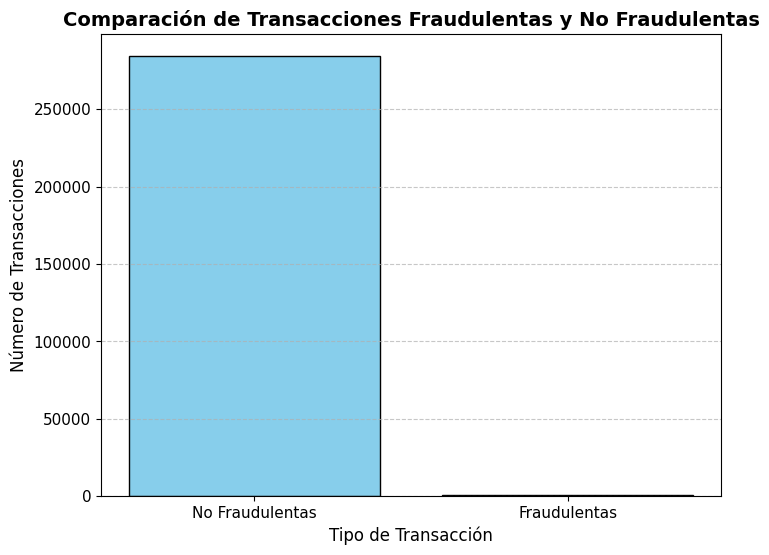

In [10]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
fraud_counts = df['Class'].value_counts()

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
plt.figure(figsize=(8, 6))
plt.bar(['No Fraudulentas', 'Fraudulentas'], fraud_counts, color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Comparación de Transacciones Fraudulentas y No Fraudulentas', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Transacción', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


Si vemos este gráfico, podemos apreciar un claro desequilibrio entre las transacciones fraudulentas y las no fraudulentas, con las no fraudulentas superando en número a las fraudulentas. Por este motivo, deberiamos a la hora de realizar un entrenamiento de un modelo de machine learing, aplicar técnicas de balanceo de los datos para realizar una mejor clasificación.

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


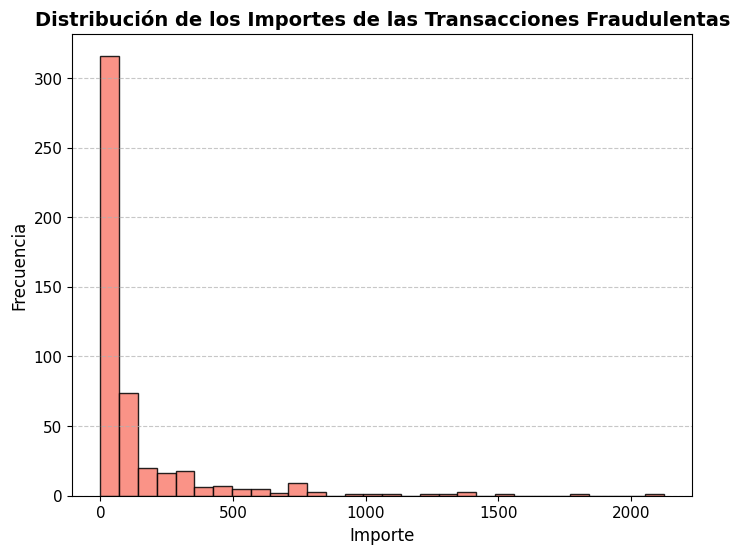

In [11]:
# Separa los datos de transacciones fraudulentas
fraud_transactions = df[df['Class'] == 1]['Amount']

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(8, 6))
plt.hist(fraud_transactions, bins=30, color='salmon', edgecolor='black', alpha=0.85)
plt.title('Distribución de los Importes de las Transacciones Fraudulentas', fontsize=14, fontweight='bold')
plt.xlabel('Importe', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

El histograma muestra cómo se distribuyen los importes de las transacciones fraudulentas, con una mayor frecuencia en los importes más bajos y una menor frecuencia en los importes más altos.

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [12]:
from sklearn.model_selection import train_test_split
# Separa los datos de entrenamiento y evaluación
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

Voy a entrenar dos modelos comunes para este tipo de problema, además de entrenar un modelo más complejo que me permita luego aplicar técnicas de explicabilidad para analizar su comportamiento:

- Regresión Logística: Simple, interpretativo y adecuado para detección de fraude.
- Bosque Aleatorio: Modelo de ensamble más avanzado, generalmente más preciso en problemas complejos.
- XGBoost: Algoritmo de boosting basado en árboles de decisión que suele ofrecer un rendimiento superior, especialmente en problemas desbalanceados. Su capacidad para ajustar pesos a las muestras y minimizar errores iterativamente lo hace muy eficaz en la detección de fraudes. Además, su estructura permite aplicar técnicas de interpretabilidad como SHAP para entender qué variables son las más relevantes para la predicción.

#### Modelo 1: Regresión Logística

In [13]:
# Entrenar modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic)

#### Modelo 2: Bosque Aleatorio

In [14]:
# Entrenar modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)


#### Modelo 3. XGBoost con SHAP para explicabilidad

In [15]:
# Entrenar modelo de Bosque Aleatorio
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Realizar predicciones y evaluar el modelo
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

Voy a ejecutar este código para entrenar ambos modelos y mostrar los resultados de la evaluación, que incluirán el reporte de clasificación y precisión para cada modelo.

In [16]:
print("Resultados del Modelo 1: Regresión Logística")
print(logistic_report)
print("\n Resultados del Modelo 2: Bosque Aleatorio")
print(rf_report)
print("\n Resultados del Modelo 3: XGBoost")
print(xgb_report)

Resultados del Modelo 1: Regresión Logística
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962


 Resultados del Modelo 2: Bosque Aleatorio
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


 Resultados del Modelo 3: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   m

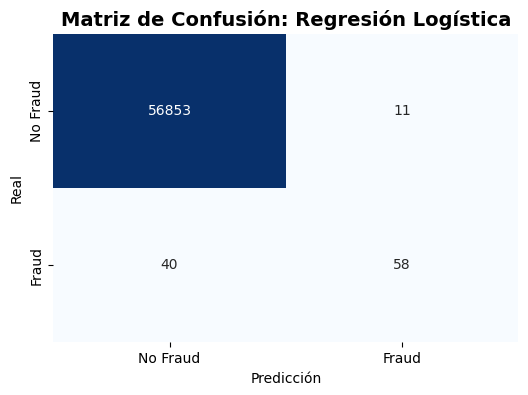

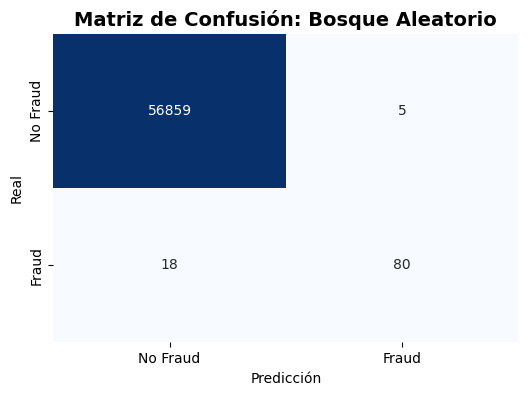

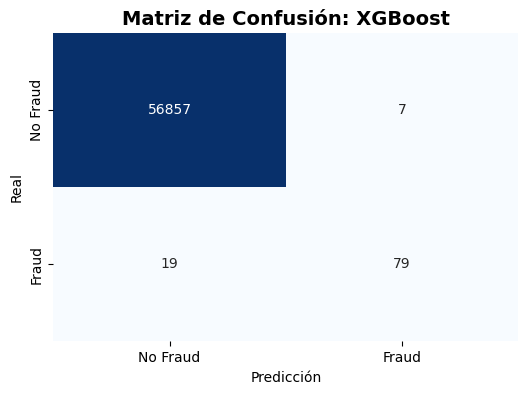

In [17]:
#Escribe tu código aquí
def plot_confusion_matrix(y_true, y_pred, title):
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Crear un heatmap con la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.title(f'Matriz de Confusión: {title}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, 'Regresión Logística')

plot_confusion_matrix(y_test, y_pred_rf, 'Bosque Aleatorio')

plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

## Interpretabilidad de los modelos

Tras entrenar el modelo, sin realizar un estudio como afecta el desbalanceo de los datos, se decidio analizar estudiar y entender el como afectan las diferentes características de los datos al modelo XGBoost, para ello se decidio utilizar la librería shap que ofrece diferentes métodos y funciones para entenderlo.


En primer lugar, crearemos un objeto de la clase explainer usando `shap.Explainer(xgb_model, X_train)`, que configura la explicación basada en el modelo entrenado (`xgb_model`) y los datos de entrenamiento (`X_train`). Luego, se calculan los valores de SHAP para el conjunto de prueba (`X_test`) usando explainer(`X_test`).

Con esto podremos luego generar un gráfico con el que se resume la importancia media de cada característica en el modelo, lo cual es útil para interpretar cómo cada variable contribuye al resultado.

 99%|===================| 56420/56962 [01:37<00:00]        

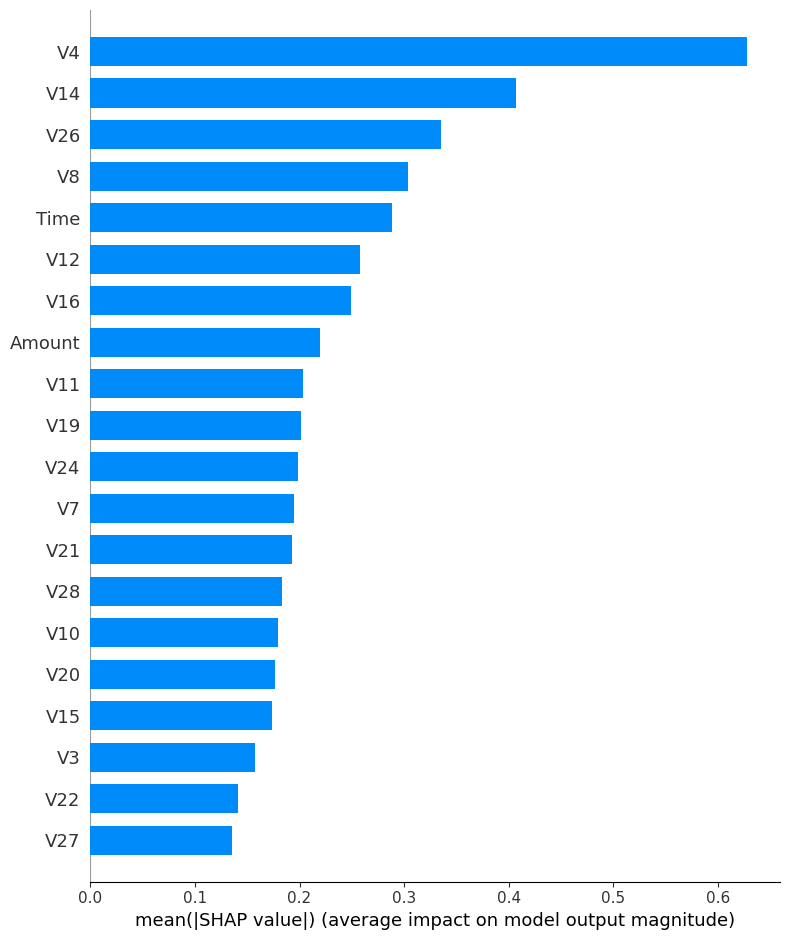

In [18]:
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

Cada barra en el gráfico representa una característica del conjunto de datos, y su longitud indica la magnitud promedio del impacto que esa característica tiene sobre la salida del modelo. En este caso:

- V4, V14, y V26 son las características más importantes según el modelo, ya que tienen los valores SHAP promedio más altos. Esto significa que estas variables tienen un impacto significativo en la predicción de fraude.

- V8, Time, y V12 también se muestran como relevantes, aunque su impacto medio es menor comparado con las variables líderes.

- Las características menos relevantes son aquellas que se encuentran al final de la lista, como V22 y V27, que tienen valores SHAP bajos.

La longitud de las barras indica la importancia de cada característica para la predicción promedio del modelo.


- Características como V4 y V14 muestran un impacto mayor, lo que sugiere que estas variables juegan un papel fundamental para que el modelo determine si una transacción es fraudulenta.
- Time y Amount (Tiempo y Cantidad) también tienen influencia, aunque menor, lo cual es interesante porque permite ver cómo el comportamiento temporal o la cantidad de dinero de la transacción pueden ayudar al modelo a identificar fraudes.


El objetivo de este tipo de gráficos es facilitar la interpretabilidad del modelo. Al ser un problema de detección de fraude, es crucial poder explicar por qué un modelo clasifica una transacción como fraudulenta o no. Este nivel de transparencia ayuda a validar los resultados del modelo y a identificar si está aprendiendo patrones legítimos de los datos o si está siendo influenciado por sesgos innecesarios.

Este gráfico también permite al equipo de analistas y desarrolladores identificar las características clave que deberían ser objeto de mayor investigación, tanto para mejorar el modelo como para ayudar a los especialistas en negocio a entender qué factores están más relacionados con el fraude.

El único inconveniente sería que debido a que las características de los datos están anonimizadas, no podemos saber que representan exactamente estas características.

## Estudio del desbalanceo de los datos

El desbalanceo de datos ocurre cuando las clases en un conjunto de datos no están representadas equitativamente, es decir, una clase es significativamente más numerosa que otra. En el contexto de la detección de fraudes con tarjetas de crédito, las transacciones fraudulentas suelen ser una minoría en comparación con las transacciones legítimas. Este desbalance puede afectar negativamente el rendimiento de los modelos de aprendizaje automático, ya que estos pueden inclinarse a predecir siempre la clase mayoritaria, ignorando la minoritaria.

**Efectos del desbalanceo de datos:**

- Sesgo del modelo: Los algoritmos pueden aprender a predecir predominantemente la clase mayoritaria, resultando en una alta precisión aparente pero con un bajo rendimiento en la detección de la clase minoritaria.

- Métricas engañosas: Métricas como la precisión pueden ser engañosas en conjuntos de datos desbalanceados. Por ejemplo, si el 99% de las transacciones son legítimas, un modelo que siempre prediga "legítimo" tendrá una precisión del 99%, pero no detectará fraudes.

Como ocurre en este problema, por este motivo se ha decidido realizar un estudio para ver si aplicando técnicas de desbalanceo se consigue mejorar los resultados de los diferentes modelos.

En este caso, se probarán dos alternativas a partir de las particiones de datos ya utilizadas anteriormente.
- Utilizar todos los datos de la clase minoritaria y escoger aleatoriamente la misma cantidad de datos de la otra clase. Esto hará que tengamos una distribución del 50-50, pero puede resultar muy sensible a las instancias seleccionadas.
- Utilizar el método SMOTE para realizar el preprocesamiento.

### Distribución 50-50

In [19]:


# Crear un dataset balanceado seleccionando aleatoriamente la misma cantidad de datos de ambas clases en el conjunto de entrenamiento
fraud_train = X_train[y_train == 1]
non_fraud_train = X_train[y_train == 0]

# Submuestrear la clase mayoritaria
non_fraud_sample = resample(non_fraud_train,
                            replace=False,  # No se permite reemplazo
                            n_samples=len(fraud_train),  # Igual al tamaño de la clase minoritaria
                            random_state=42)  # Para reproducibilidad

# Combinar la clase minoritaria con la muestra de la clase mayoritaria
X_train_balanced = pd.concat([fraud_train, non_fraud_sample])
y_train_balanced = pd.concat([y_train[y_train == 1], y_train[non_fraud_sample.index]])

# Verificar la nueva distribución en el conjunto de entrenamiento
print("Distribución del conjunto de entrenamiento balanceado (50-50):")
print(y_train_balanced.value_counts())

Distribución del conjunto de entrenamiento balanceado (50-50):
Class
1    394
0    394
Name: count, dtype: int64


#### Modelo 1: Regresión Logística

In [20]:
# Entrenar modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones y evaluar el modelo
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic)

#### Modelo 2: Bosque Aleatorio

In [21]:
# Entrenar modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones y evaluar el modelo
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)


#### Modelo 3. XGBoost con SHAP para explicabilidad

In [22]:
# Entrenar modelo de Bosque Aleatorio
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)
# Realizar predicciones y evaluar el modelo
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

Voy a ejecutar este código para entrenar ambos modelos y mostrar los resultados de la evaluación, que incluirán el reporte de clasificación y precisión para cada modelo.

In [23]:
print("Resultados del Modelo 1: Regresión Logística")
print(logistic_report)
print("\n Resultados del Modelo 2: Bosque Aleatorio")
print(rf_report)
print("\n Resultados del Modelo 3: XGBoost")
print(xgb_report)

Resultados del Modelo 1: Regresión Logística
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962


 Resultados del Modelo 2: Bosque Aleatorio
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962


 Resultados del Modelo 3: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   m

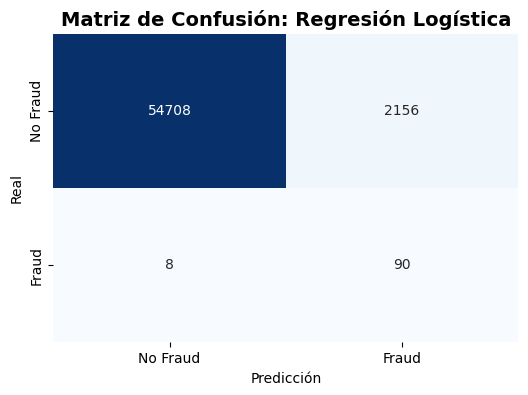

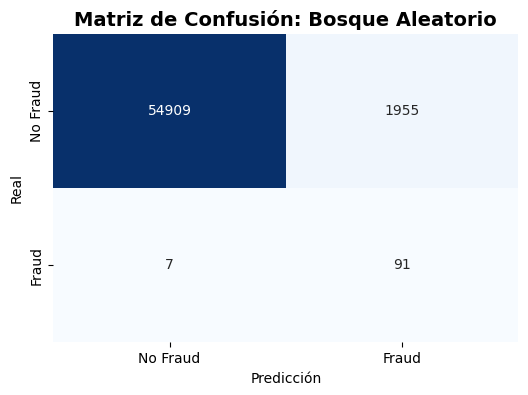

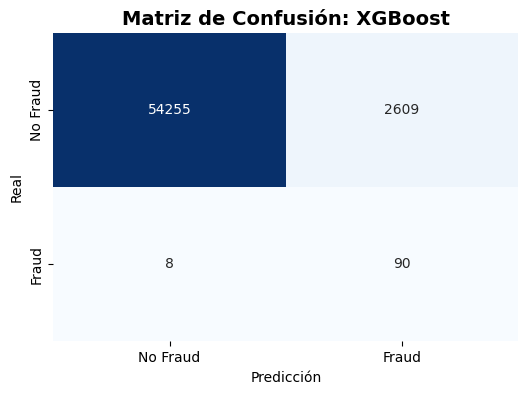

In [24]:
plot_confusion_matrix(y_test, y_pred_logistic, 'Regresión Logística')

plot_confusion_matrix(y_test, y_pred_rf, 'Bosque Aleatorio')

plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')

Como podemos observar al utilizar en enfoque de 50-50, no hemos conseguido mejorar ninguno de los modelos, sino que los hemos empeorado, esto es entendible ya que solamente hemos utilizado al final unas 400 instancias de cada clase, y estas no resultan lo suficiente representativas. Eso si, de esta forma hemos conseguido mejorar la precisión para la clase minoritaria que todos los modelos acierten en más de 90 de las instancias, a costa de fallar en la clase mayoritaría.

### Usando SMOTE

In [25]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución en el conjunto de entrenamiento
print("Distribución del conjunto de entrenamiento balanceado con SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Distribución del conjunto de entrenamiento balanceado con SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


#### Modelo 1: Regresión Logística

In [26]:
# Entrenar modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_smote, y_train_smote)

# Realizar predicciones y evaluar el modelo
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic)

#### Modelo 2: Bosque Aleatorio

In [27]:
# Entrenar modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Realizar predicciones y evaluar el modelo
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)


#### Modelo 3. XGBoost con SHAP para explicabilidad

In [28]:
# Entrenar modelo de Bosque Aleatorio
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
# Realizar predicciones y evaluar el modelo
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

Voy a ejecutar este código para entrenar ambos modelos y mostrar los resultados de la evaluación, que incluirán el reporte de clasificación y precisión para cada modelo.

In [29]:
print("Resultados del Modelo 1: Regresión Logística")
print(logistic_report)
print("\n Resultados del Modelo 2: Bosque Aleatorio")
print(rf_report)
print("\n Resultados del Modelo 3: XGBoost")
print(xgb_report)

Resultados del Modelo 1: Regresión Logística
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.90      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962


 Resultados del Modelo 2: Bosque Aleatorio
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


 Resultados del Modelo 3: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.85      0.82        98

    accuracy                           1.00     56962
   m

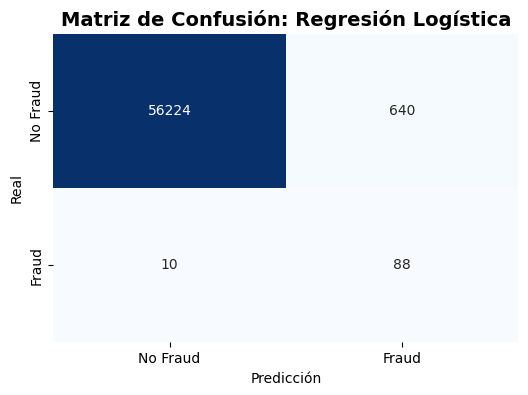

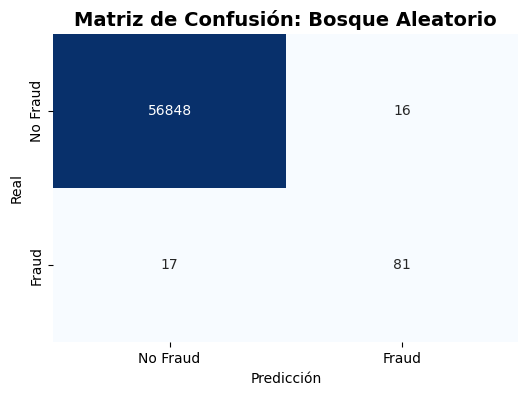

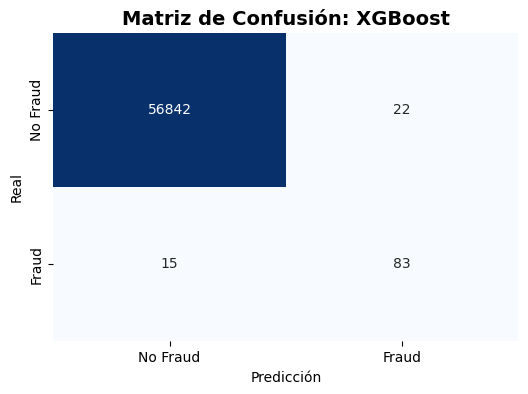

In [30]:
plot_confusion_matrix(y_test, y_pred_logistic, 'Regresión Logística')

plot_confusion_matrix(y_test, y_pred_rf, 'Bosque Aleatorio')

plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')

En este caso, hemos conseguido mejorar también en todos los modelos manteniendo una mayor proporción de las clases.

# Conclusiones

Con este pequeño cuaderno, se ha conseguido obtener una mejor comprensión de como los modelos de machine learning, pueden resolver problemas que a simple vista un humano no podría resolver, además de facilitar mucho algunas tareas. Además que con este se ha podido unificar los diferentes conceptos vistos a lo largo del curso. Aspectos, que podrían haber resultado interesantes a realizar pero por la falta de tiempo se han omitido, realizar algún tipo de optimización de los hiperparámetros de los modelos, ya que se podría intentar mejorar de esta forma los resultados, para lo cual podríamos utilizar funciones como Grid Search de sklearn o una optimización bayesiana, pero esto no se ha visto tanto en el curso.